## 3 Simple ways to optimize pandas

1. **Optimize datatypes**
2. **Use built-in functions**
3. **Search for smart alternative**
4. **Do tests**  

Bonus tips:
1. **Use NumPy arrays/matrix**

```python 
# Convert the frame to its Numpy-array representation. Deprecated since version 0.23.0
numpy_matrix = df.as_matrix() 

#Return a Numpy representation of the DataFrame.
df.values

# Convert the DataFrame to a NumPy array
df.to_numpy() 
```
2. **Optimize data when you read it**
```python 
pandas.read_csv('foo.csv', dtype={'a': 'int'})
```
3. **Convert dates to Datetime**

```python 
df['start_date'] = pd.to_datetime(df['start_date'])
```

4. **Loop Pandas data in smart way ( iterrows, itertuples, zip )**

https://stackoverflow.com/questions/7837722/what-is-the-most-efficient-way-to-loop-through-dataframes-with-pandas

```python
for i,r in t.iterrows(): # 0.5639059543609619
for ir in t.itertuples(): # 0.017839908599853516
for r in zip(t['a'], t['b']): # 0.005645036697387695
```  

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)  # or 1000
pd.set_option("display.max_rows", None)  # or 1000
pd.set_option("display.max_colwidth", 500)  # or 199
pd.set_option("display.expand_frame_repr", True)  # or 199

# read the data frame and see the data insight
df = pd.read_csv("../csv/stackoverflow/developer_survey_2018/survey_results_public.csv", low_memory=False)
print(df.shape)

(98855, 129)


In [2]:
df.dtypes.head()

Respondent     int64
Hobby         object
OpenSource    object
Country       object
Student       object
dtype: object

In [3]:
df.head(2)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own company,"I’m not actively looking, but I am open to new opportunities",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or tool without taking a formal course;Participated in a hackathon","The official documentation and/or standards for the technology;A book or e-book from O’Reilly, Apress, or a similar publisher;Questions & answers on Stack Overflow;Online developer communities other than Stack Overflow (ex. forums, listservs, IRC channels, etc.)",NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,"Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/Aurora;Microsoft Azure (Tables, CosmosDB, SQL, etc)","Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/Aurora;Microsoft Azure (Tables, CosmosDB, SQL, etc)",AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researched it (without clicking on the ad);Stopped going to a website because of their advertising,1.0,5.0,4.0,7.0,2.0,6.0,3.0,"Artificial intelligence surpassing human intelligence (""the singularity"")",Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than worried about the dangers.,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Mu

In [4]:
df.OpenSource.unique()

array(['No', 'Yes'], dtype=object)

In [6]:
df.Student.unique()

array(['No', 'Yes, part-time', nan, 'Yes, full-time'], dtype=object)

In [7]:
df.Student.value_counts(dropna=False)

No                70399
Yes, full-time    18394
Yes, part-time     6108
NaN                3954
Name: Student, dtype: int64

## 1. Optimize datatypes

* donwcast numbers when is not needed
* use categories

In [8]:
# optimize storage for dataframe with numbers

gl_int = df.select_dtypes(include=["int"])
converted_int = gl_int.apply(pd.to_numeric, downcast="unsigned")


def mem_usage(pandas_obj):
    if isinstance(pandas_obj, pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else:  # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2  # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

print(mem_usage(gl_int))
print(mem_usage(converted_int))

0.75 MB
0.38 MB


In [9]:
# convert columns to categorical

def as_categorical(df):
    df['CompanySize'] = df.CompanySize.astype('category')
    df['Country'] = df.Country.astype('category')
    df['Hobby'] = df.Hobby.astype('category')
    df['YearsCoding'] = df.YearsCoding.astype('category')
    df['Employment'] = df.Employment.astype('category')
    df['LastNewJob'] = df.LastNewJob.astype('category')
    df['JobSatisfaction'] = df.JobSatisfaction.astype('category')
    df['CareerSatisfaction'] = df.CareerSatisfaction.astype('category')    

print(mem_usage(df))
as_categorical(df)
print(mem_usage(df))

622.07 MB
572.40 MB


In [10]:
print(mem_usage(df))
df['OpenSource'] = df.OpenSource.astype('category')
print(mem_usage(df))

572.40 MB
566.89 MB


## 2. Use built-in functions

In [11]:
# optimize performance by using built in functions

import cProfile

def before(df):
    duplicated_data = [group for _, group in df.groupby('Salary') if len(group) > 1]


def after(df):
    duplicated_data = df[df['Salary'].duplicated(keep=False)]


cProfile.run("before(df)")
cProfile.run("after(df)")

         5765285 function calls (5689280 primitive calls) in 3.477 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     7999    0.005    0.000    0.008    0.000 <frozen importlib._bootstrap>:416(parent)
   192010    0.093    0.000    0.210    0.000 <frozen importlib._bootstrap>:997(_handle_fromlist)
        1    0.000    0.000    3.446    3.446 <ipython-input-11-1b7ad6e6c47c>:5(before)
        1    0.019    0.019    3.445    3.445 <ipython-input-11-1b7ad6e6c47c>:6(<listcomp>)
        1    0.030    0.030    3.477    3.477 <string>:1(<module>)
     4001    0.003    0.000    0.006    0.000 __init__.py:205(iteritems)
        1    0.000    0.000    0.012    0.012 _decorators.py:136(wrapper)
        9    0.000    0.000    0.001    0.000 _methods.py:26(_amax)
        9    0.000    0.000    0.001    0.000 _methods.py:30(_amin)
     8003    0.004    0.000    0.042    0.000 _methods.py:42(_any)
        1    0.000    0.000    0.000   

         3003 function calls (2973 primitive calls) in 0.114 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:416(parent)
       94    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:997(_handle_fromlist)
        1    0.000    0.000    0.094    0.094 <ipython-input-11-1b7ad6e6c47c>:9(after)
        1    0.020    0.020    0.114    0.114 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 __init__.py:205(iteritems)
        9    0.000    0.000    0.009    0.001 _methods.py:26(_amax)
        9    0.000    0.000    0.005    0.001 _methods.py:30(_amin)
        5    0.000    0.000    0.000    0.000 _methods.py:42(_any)
       10    0.000    0.000    0.000    0.000 _weakrefset.py:70(__contains__)
       10    0.000    0.000    0.000    0.000 abc.py:180(__instancecheck__)
       12    0.000    0.000    0.000    0.000 algorithms.p

In [12]:
%timeit before(df)

2.06 s ± 15.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%timeit after(df)

91.7 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 3. Search for smart alternative

In [14]:
import cProfile

def before(df):
    df["exists"] = ~df.apply(lambda x: x.LanguageDesireNextYear in x.LanguageWorkedWith, axis="columns")


def after(df):
    df_split = df["LanguageDesireNextYear"].str.split(",", expand=True)
    df["exists"] = df_split.isin(df["LanguageWorkedWith"]).any(1)

df.LanguageDesireNextYear = df.LanguageDesireNextYear.fillna('missing')
df.LanguageWorkedWith = df.LanguageWorkedWith.fillna('missing')
cProfile.run("before(df)")
cProfile.run("after(df)")

         24422831 function calls (23928513 primitive calls) in 13.653 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        6    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:416(parent)
   296623    0.156    0.000    0.348    0.000 <frozen importlib._bootstrap>:997(_handle_fromlist)
        1    0.049    0.049   13.653   13.653 <ipython-input-14-e9e5394ea9c3>:3(before)
    98855    0.221    0.000    4.778    0.000 <ipython-input-14-e9e5394ea9c3>:4(<lambda>)
        1    0.000    0.000   13.653   13.653 <string>:1(<module>)
        1    0.002    0.002    0.002    0.002 __init__.py:124(lrange)
        4    0.000    0.000    0.000    0.000 __init__.py:205(iteritems)
        1    0.000    0.000    0.000    0.000 _decorators.py:136(wrapper)
        1    0.000    0.000    0.000    0.000 _methods.py:42(_any)
        2    0.000    0.000    0.000    0.000 _methods.py:45(_all)
   197721    0.097    0.000    0.097 

         1088861 function calls (1088853 primitive calls) in 0.353 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       18    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:997(_handle_fromlist)
        1    0.005    0.005    0.353    0.353 <ipython-input-14-e9e5394ea9c3>:7(after)
        1    0.000    0.000    0.353    0.353 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 __init__.py:205(iteritems)
        3    0.000    0.000    0.000    0.000 _methods.py:42(_any)
    98862    0.024    0.000    0.024    0.000 _weakrefset.py:70(__contains__)
    98861    0.030    0.000    0.054    0.000 abc.py:180(__instancecheck__)
        1    0.000    0.000    0.000    0.000 accessor.py:129(__get__)
        1    0.000    0.000    0.000    0.000 base.py:142(_freeze)
        3    0.000    0.000    0.000    0.000 base.py:147(__setattr__)
        1    0.000    0.000    0.000    0.000 base.py:1569(is_uniqu

In [15]:
%timeit before(df)

7.59 s ± 48.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%timeit after(df)

147 ms ± 2.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Do tests

[For loops with pandas - When should I care?](https://stackoverflow.com/questions/54028199/for-loops-with-pandas-when-should-i-care)

100%|██████████| 15/15 [00:32<00:00,  1.85s/it]A


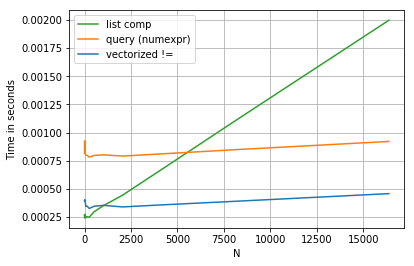

In [18]:
import perfplot  
import pandas as pd
import numpy as np

perfplot.show(
    setup=lambda n: pd.DataFrame(np.random.choice(1000, (n, 2)), columns=['A','B']),
    kernels=[
        lambda df: df[df.A != df.B],
        lambda df: df.query('A != B'),
        lambda df: df[[x != y for x, y in zip(df.A, df.B)]]
    ],
    labels=['vectorized !=', 'query (numexpr)', 'list comp'],
    n_range=[2**k for k in range(0, 15)],
    xlabel='N'
)